# DAML notes
## 6. Linear models for classification

<hr style="border:2px solid black"> </hr>



In [1]:
# RUN THIS CELL FIRST

# Imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay

# This makes matplotlib output nice figures without much tweaking
plt.rcParams.update(
    {
        "lines.markersize": 10,  # Big points
        "font.size": 15,  # Larger font
        "xtick.major.size": 5.0,  # Bigger xticks
        "ytick.major.size": 5.0,  # Bigger yticks
    }
)

Given a training set of $N$ data point-target pairs $\{(\mathbf{x}^{(n)}, y^{(n)})\}_{n=1}^{N}$ where $\mathbf{x}\in \mathbb{R}^{D}$ and $y\in \mathbb{Z}^+_{<K} = \{0,1,\ldots,K-1\}$ the goal in classification is to obtain a model that can predict the correct class (i.e. correct value of $y$) for each training point. Although, what we actually want is for the model to generalise to unseen test data!

> **Note: I tend to use the terms linear classifier and linear model interchangeably for classification but if we're being rigorous, a linear classifier should refer to a linear model coupled with a choice of threshold function.**

### 6.1 Linear models for binary classification

In a binary classification problem, there are two possible labels. These are typically either denoted as $y\in \{0,1\}$ or $y\in \{-1,1\}$ depending on what is most mathematically convenient.

A linear model for binary classification looks very similar to a linear model for regression:


\begin{equation}f(\mathbf{x}) = \mathbf{w}^\top \mathbf{x} + b\end{equation}

> **When we write the maths for classification, we DON'T tend to prepend our data points with a $1$ as we did for regression. The bias parameter is typically made explicit.** 

$\mathbf{w}\in \mathbb{R}^{D}$ is a vector of learnable weights and there is a learnable bias $b\in\mathbb{R}$.

Once we have learnt the weights, $f(\mathbf{x})\in\mathbb{R}$ can be used to make class predictions using some threshold function such as 


\begin{equation}\hat{y}=\begin{cases}
          1 \quad &\text{if} \, f(\mathbf{x}) \geq0 \\
          0 \quad &\text{if} \, f(\mathbf{x})<0 \\
     \end{cases}\end{equation}
     

This leads to the important concept of a decision boundary. For the threshold function above, $f(\mathbf{x})=0$ defines a hyperplane either side of which points will be put into different classes.

In 2D, this is a line. By writing $\mathbf{w}=\begin{bmatrix}w_1&w_2\end{bmatrix}^\top$ and $\mathbf{x}=\begin{bmatrix}x_1&x_2\end{bmatrix}^\top$ we can rewrite $f(\mathbf{x})$ in terms of scalar quantities:

\begin{equation}f(\mathbf{x})= w_1 x_1 + w_2 x_2 + b \end{equation}

We can then set $f(\mathbf{x})=0$ and rearrange to get the equation of a line which defines the decision boundary.

\begin{equation} x_2 = - \frac{w_1}{w_2} x_1 - \frac{b}{w_2} \end{equation}



### 6.2 Logistic regression

The parameters $\mathbf{w},b$ of a linear classifier need to be learnt using training data. This boils down to defining a loss function $L$ and then solving $\underset{\mathbf{w},b}{\mathrm{minimise}} L$. This process is usually referred to as fitting, learning, or training!



We are going to focus on logistic regression which involves minimising the so-called log loss. The motivation is as follows: we don't just want $f(\mathbf{x})$ to just tell us how a certain point should be classified, we would prefer that it captured some notion of uncertainty. Probabilities are ideal quantities for this purpose. However, $f(\mathbf{x})$ cannot represent probabilities as it is unbounded; it can take values greater than 1 and less than 0 whereas probabilities must be between 0 and 1.

Instead, we allow $f(\mathbf{x})$ to represent some unbounded quantity that is *related* to a probability. Specifically, we define $f(\mathbf{x})$ as the log-odds that a point $\mathbf{x}$ is in class 1, which relates to $p(y=1|\mathbf{x})$.

\begin{equation}f(\mathbf{x}) = \log\frac{p(y=1 | \mathbf{x})}{1-p(y=1 | \mathbf{x})}
\end{equation}

We can rearrange this expression to get $p(y=1|\mathbf{x})$ in terms of log-odds:

\begin{equation}p(y=1 | \mathbf{x}) = \frac{1}{1+e^{-f(\mathbf{x})}}=\sigma({f(\mathbf{x})})=\sigma(\mathbf{w}^\top {\mathbf{x}}+b)\end{equation}

Here we have defined the sigmoid function as $\sigma(z)=\frac{1}{1+e^{-z}}$ which squashes unbounded quantities to be between 0 and 1.

Text(0.5, 0, '$z$')

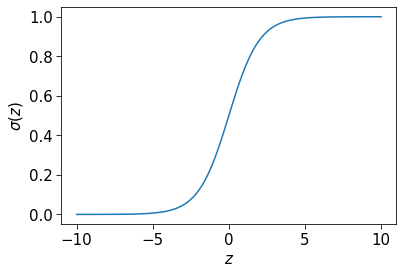

In [2]:
z = np.linspace(-10, 10, 100)
sigma_z = 1 / (1 + np.exp(-z))

fig, ax = plt.subplots()
ax.plot(z, sigma_z)
ax.set_ylabel("$\sigma (z)$")
ax.set_xlabel("$z$")

To make a prediction, it is sensible to classify a point $\mathbf{x}$ as class $1$ if $p(y=1|\mathbf{x})>p(y=0|\mathbf{x})$ and as class $0$ otherwise. As there are two classes, $p(y=1|\mathbf{x})+p(y=0|\mathbf{x})=1$. This means that $p(y=1|\mathbf{x})>p(y=0|\mathbf{x})$ occurs when $p(y=1|\mathbf{x})>0.5$. Our threshold function should therefore be


\begin{equation}\hat{y}=\begin{cases}
          1 \quad &\text{if} \, p(y=1 | \mathbf{x})\geq  0.5 \\
          0 \quad &\text{if} \, p(y=1 | \mathbf{x})<0.5 \\
     \end{cases}\end{equation}
     

     
Noting that $p(y=1 | \mathbf{x})=  0.5$ when $f(\mathbf{x})=0$ let's us rewrite this in terms of the log-odds.

\begin{equation}\hat{y}=\begin{cases}
          1 \quad &\text{if} \, f(\mathbf{x})\geq  0\\
          0 \quad &\text{if} \, f(\mathbf{x})<0\\
     \end{cases}\end{equation}

To derive the log loss itself, we start by noting that 

\begin{equation}p(y=0|\mathbf{x})=1 -\sigma(f(\mathbf{x}))\end{equation}

We can combine this with our expression for $p(y=1|\mathbf{x})$ to succinctly write

\begin{equation}p(y | \mathbf{x})= \sigma(f(\mathbf{x}))^{y}(1-\sigma(f(\mathbf{x}))^{1-y}\end{equation}

We can now consider the likelihood of our training data $\{(\mathbf{x}^{(n)}, y^{(n)})\}_{n=1}^{N}$ according to the model. That is, the probability of the labels being $y^{(1)}, y^{(2)}, ... y^{(N)}$ given that the data points are $\mathbf{x}^{(1)}, \mathbf{x}^{(2)},..., \mathbf{x}^{(N)}$. If we assume that data points are independent of each other then we can write the likelihood as:

\begin{equation} \prod_n p(y^{(n)} | \mathbf{x}^{(n)})=\prod_n \sigma(f(\mathbf{x}^{(n)}))^{y^{(n)}}(1-\sigma(f(\mathbf{x}^{(n)}))^{1-y^{(n)}}\end{equation}

We want this quantity to be high. This is equivalent to making the **negative log** of this quantity low. We can further divide this by the number of data points as it has no effect on the optimisation problem. This gives us the negative log-likelihood, or **log loss**.

\begin{equation}\mathrm{NLL}(\mathbf{w},b)=- \frac{1}{N}\sum_n \Big[y^{(n)} \log \sigma(f(\mathbf{x}^{(n)}))+({1-y^{(n)}})\log(1- \sigma(f(\mathbf{x}^{(n)})))\Big]\end{equation}

We can make this more succinct by writing $p^{(n)}=\sigma(f(\mathbf{x}^{(n)}))$:

\begin{equation}L_{log}=- \frac{1}{N}\sum_n \Big[y^{(n)} \log p^{(n)}+({1-y^{(n)}})\log(1- p^{(n)})\Big]\end{equation}

Solving $\underset{\mathbf{w},b}{\mathrm{minimise}} L_{log}$ is equivalent to performing logistic regression.

### 6.3 Logistic regression example

After that mathematical pre-amble, let's look at a logistic regression model on some 2D dummy data.

First, let's create and plot the data:

[]

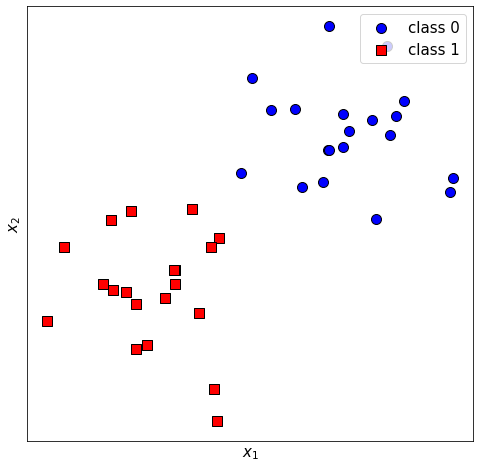

In [3]:
np.random.seed(42)
x0 = np.vstack((np.random.normal(1, 0.6, size=20), np.random.normal(1, 0.6, size=20))).T
x1 = np.vstack(
    (np.random.normal(-1, 0.6, size=20), np.random.normal(-1, 0.6, size=20))
).T

# Make plot
fig, ax = plt.subplots(figsize=[8, 8])
ax.scatter(x0[:, 0], x0[:, 1], color="b", edgecolors="black")
ax.scatter(x1[:, 0], x1[:, 1], color="r", marker="s", edgecolors="black")
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
plt.legend(["class 0", "class 1"], loc="upper right")
ax.set_xticks([])
ax.set_yticks([])

Now we can use a [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) object from sklearn to do the grunt work. This includes L2 regularisation in by default, so when we call `.fit` it is actually finding the parameters that minimise

\begin{equation} L= \underbrace{L_{log}}_{classification}+ \underbrace{ \frac{\lambda}{2} \lVert \mathbf{w}\rVert^2 }_{regularisation}\end{equation}

where $\lambda$ is the inverse of the `C` argument. 

In [4]:
X = np.vstack((x0, x1))
y = np.hstack((np.zeros(len(x0)), np.ones(len(x1))))

model = LogisticRegression(random_state=0, C=1).fit(X, y)

Given some dummy point, we can see the predicted class labels and probabilities for class 0 and 1:
    

In [5]:
x_dummy = np.array([0, 1]).reshape(1, -1)

print(model.predict(x_dummy))
print(model.predict_proba(x_dummy))

[0.]
[[0.85950422 0.14049578]]


We can also see its learnt parameters:

In [6]:
print(f"w:{model.coef_[0]}")
print(f"b:{model.intercept_[0]}")

w:[-1.75890498 -1.56921751]
b:-0.24196077436765434


We can use sklearn's [DecisionBoundaryDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html) to show the decision boundary of the classifier alongside the training data.

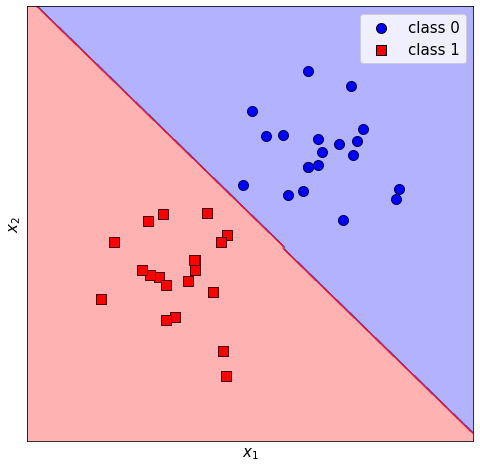

In [7]:
# Make plot
fig, ax = plt.subplots(figsize=[8, 8])

ax.scatter(x0[:, 0], x0[:, 1], color="b", edgecolors="black")
ax.scatter(x1[:, 0], x1[:, 1], color="r", marker="s", edgecolors="black")
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
plt.legend(["class 0", "class 1"], loc="upper right")
ax.set_xticks([])
ax.set_yticks([])
colours = ["b", "r"]

# Plot decision boundary
disp = DecisionBoundaryDisplay.from_estimator(
    model,
    X,
    response_method="predict",
    alpha=0.3,
    grid_resolution=200,
    cmap=ListedColormap(colours),
    ax=ax,
)

In the lab, you will consider lines that correspond to certain probabilities of the model.

### 6.4 Perceptrons [Optional]

A perceptron is an obsolete, but historically significant classifier. There is no reason why you should use it but it is [available in sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html)!

It is a linear model $f(\mathbf{x}) = \mathbf{w}^\top \mathbf{x} + b$ whose weights and biases have been learnt through the perceptron algorithm.

Assuming that the labels are given by $y\in \{-1,1\}$, we will use the threshold function  $\hat{y}=\begin{cases}
          1 \quad &\text{if} \, f(\mathbf{x}) \geq0 \\
          -1 \quad &\text{if} \, f(\mathbf{x})<0 \\
     \end{cases}$

If $\hat{y}^{(n)}$ is our class prediction for some training point $\mathbf{x}^{(n)}$ then we want 

$$f(\mathbf{x}^{(n)}) = \mathbf{w}^\top \mathbf{x}^{(n)}+b\quad\text{s.t.} \quad\hat{y}^{(n)}=\begin{cases}
          1 \quad &\text{if} \, f(\mathbf{x}^{(n)}) \geq  0 \\
          -1 \quad &\text{if} \, f(\mathbf{x}^{(n)})<0 \\
     \end{cases}\forall n
$$

For the perceptron learning algorithm we iterate through shuffled training data and if some point $\mathbf{x}^{(n)}$ is misclassified using the threshold function we update 

1. $\mathbf{w} \leftarrow \mathbf{w} + \alpha\,y^{(n)} \mathbf{x}^{(n)}$
2. $b \leftarrow b + \alpha\,y^{(n)}$


The perceptron algorithm is simply equivalent to minimising a hinge loss through SGD.

\begin{equation}L_{hinge}= \frac{1}{N}\sum_n \max\Bigl(0, -y^{(n)} f(\mathbf{x}^{(n)})\Bigl)\end{equation}

### 6.5 Support Vector Machines

In the first year that this course ran, there was a whole lecture on SVMs! I've since decided to cut this out. All you need to know for this course this year is that SVMs are linear models that are obtained by solving $\underset{\mathbf{w},b}{\mathrm{minimise}} L_{SVM}$ where 

\begin{equation}L_{SVM}= \frac{1}{2}\lVert \mathbf{w}\lVert^2 +C\sum_n  \max\Bigl(0, 1-y^{(n)} f(\mathbf{x}^{(n)})\Bigl)\end{equation}

This encourages the distance from the decision boundary to the nearest points from each class (the margin) to be large, so that small perturbations in data don't result in a completely different classification. A logistic regression model with sufficient regularisation also has a large margin.

SVMs are available in sklearn through the [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) class.

### 6.6 Multinomial Logistic Regression

While there are several strategies for performing multi-class classification ($y\in \mathbb{Z}^+_{<K} = \{0,1,\ldots,K-1\}$ ) involving combining binary classfiers, it is simplest to use a model that gives a vector output $f(\mathbf{\mathbf{x}})\in\mathbb{R}^{K}$where elements correspond to classification scores for different classes.

This can be achieved by writing the linear model as 

\begin{equation}f(\mathbf{x}) = \mathbf{W}\mathbf{x}+\mathbf{b}\end{equation} 

where $\mathbf{W}\in \mathbb{R}^{K\times D}$ and $\mathbf{b}\in \mathbb{R}^{K}$. You can view this as being like $K$ classifiers side-by-side as each row of the matrix $\mathbf{W}$ plus the corresponding element of $b$ is the classifier score for a particular class.

In Multinomial logistic regression, we define each element of $f(\mathbf{\mathbf{x}})$ as being the **logit** for a particular class. This is an unnormalised log-probability, and may be seen as a generalisation of the log-odds to this multiclass setting.

We relate these logits to class probabilities through a squashing function called a softmax.

\begin{equation}
\mathbf{p}=\begin{bmatrix}
p(y=0 | \mathbf{x})\\
p(y=1 | \mathbf{x})\\
p(y=2 | \mathbf{x})\\
\vdots \\ 
p(y=K-1 | \mathbf{x})
\end{bmatrix}
= S (f(\mathbf{x}))
\end{equation}

where

\begin{equation}S(\mathbf{z})=S(\begin{bmatrix}
z_0\\
z_1\\
\vdots \\ 
z_{K-1}
\end{bmatrix}) = 
\begin{bmatrix}
\frac{\exp z_0}{\sum_{k=0}^{K-1}\exp z_k}\\
\frac{\exp z_1}{\sum_{k=0}^{K-1}\exp z_k}\\
\vdots \\ 
\frac{\exp z_{K-1}}{\sum_{k=0}^{K-1}\exp z_k}\\ 
\end{bmatrix}\end{equation}

In short, the softmax function $S$ turns a vector of logits into a vector of probabilities that sum to 1.

The likelihood (again assuming indepedence between data points) is now given by

\begin{equation}\prod_{n=1}^{N}\prod_{k=0}^{K-1}p(y^{(n)}=k | \mathbf{x}^{(n)})^{\mathbb{I}(y^{(n)}=k)}\end{equation}

$\mathbb{I}(y^{(n)}=k)$ is an indicator function that outputs 1 if $y^{(n)}=k$ and 0 otherwise.

From this, we may write the log-likelihood (divided by the number of data points) as

\begin{equation}\mathrm{NLL}(\mathbf{w},b)= -\frac{1}{N }\sum_{n=1}^{N}\sum_{k=0}^{K-1}\mathbb{I}(y^{(n)}=k)\log p(y^{(n)}=k | \mathbf{x}^{(n)})\end{equation}

This is a bit verbose. To succinctly write out the NLL, we will use a one-hot vector representation for each class label. This means each class label is now a vector $\mathbf{y}$ which is 1 for the element corresponding to its class, and zero elsewhere. For example, if we had 4 classes and $y^{(t)}$ was labelled as class 2 we would write $\mathbf{y}^{(t)}=\begin{bmatrix} 0&0&1&0\end{bmatrix}^\top$ (recalling that we count from zero when it comes to classes). This gives us the NLL, or log loss in the succinct form of

\begin{equation}L_{log} = \frac{1}{N}\sum_{n} -\mathbf{y}^{(n)\top}\log \mathbf{p}^{(n)}\end{equation}

Sklearn will automatically use multinomial logistic regression if you call `.fit` with data where there are more than 2 class labels.

<hr style="border:2px solid black"> </hr>

#### Written by Elliot J. Crowley and &copy; The University of Edinburgh 2022-24